# Loading Packages

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

# Reading the .csv file

In [154]:
iris = pd.read_csv('Iris.csv')
iris.head() #top 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [155]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [156]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualization

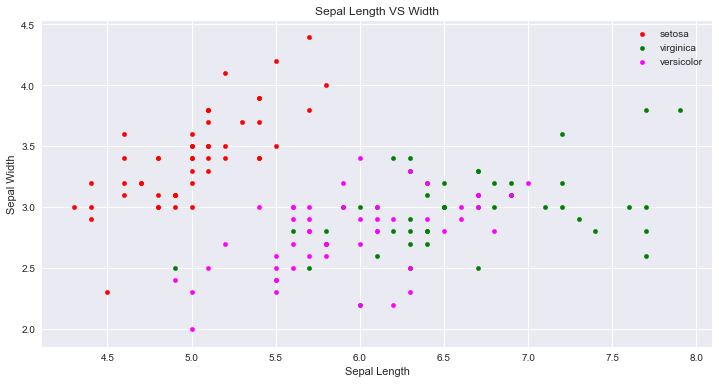

In [160]:
pl = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'red', label = 'setosa')
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green', label = 'virginica', ax=pl)
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'magenta', label = 'versicolor', ax=pl)
pl.set_xlabel("Sepal Length")
pl.set_ylabel("Sepal Width")
pl.set_title("Sepal Length VS Width")
pl = plt.gcf()
pl.set_size_inches(12, 6)



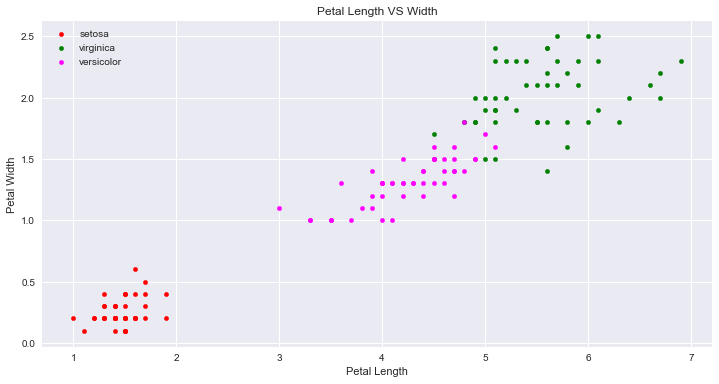

In [159]:
pl = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red', label = 'setosa')
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green', label = 'virginica', ax=pl)
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'magenta', label = 'versicolor', ax=pl)
pl.set_xlabel("Petal Length")
pl.set_ylabel("Petal Width")
pl.set_title("Petal Length VS Width")
pl = plt.gcf()
pl.set_size_inches(12, 6)


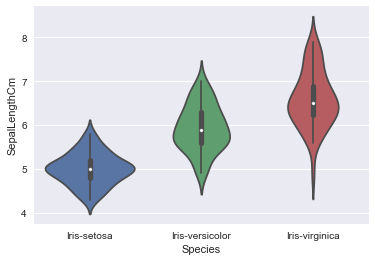

In [161]:
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)


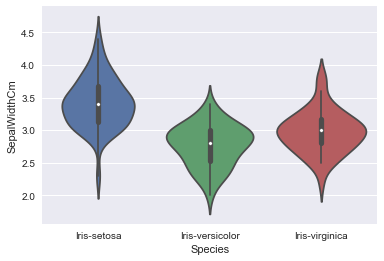

In [162]:
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

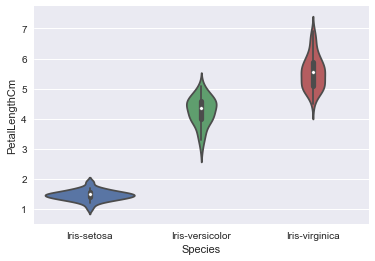

In [163]:
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)

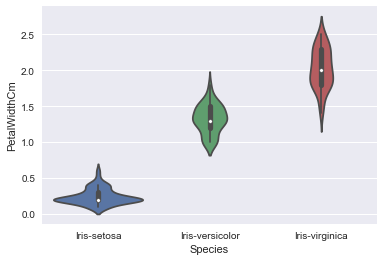

In [164]:
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)

# Analysing Data and Splitting Data into Training and Test set

In [165]:
iris.shape

(150, 6)

In [166]:
iris.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [167]:
iris.shape

(150, 5)

In [168]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.


In [169]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Thus, Sepal Length and Sepal width are not correlated whereas Petal Length and Width are highly correlated. We will later consider these combinations separately and see how it would affect our accuracy. For now let us proceed with all the features.

In [170]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [171]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_Y = train['Species']
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_Y = test.Species
print(train_X.head())
print('_'*65)
print(train_Y.head())
print('_'*65)
print(test_X.head())
print('_'*65)
print(test_Y.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
102            7.1           3.0            5.9           2.1
47             4.6           3.2            1.4           0.2
83             6.0           2.7            5.1           1.6
45             4.8           3.0            1.4           0.3
49             5.0           3.3            1.4           0.2
_________________________________________________________________
102     Iris-virginica
47         Iris-setosa
83     Iris-versicolor
45         Iris-setosa
49         Iris-setosa
Name: Species, dtype: object
_________________________________________________________________
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
82             5.8           2.7            3.9           1.2
78             6.0           2.9            4.5           1.5
145            6.7           3.0            5.2           2.3
80             5.5           2.4            3.8           1.1
149            5.9           3.0          

In [172]:
algo = SVC()
algo.fit(train_X,train_Y)
prediction = algo.predict(test_X)
metrics.accuracy_score(prediction,test_Y)

1.0

In [173]:
algo = LogisticRegression()
algo.fit(train_X,train_Y)
prediction = algo.predict(test_X)
metrics.accuracy_score(prediction,test_Y)

1.0

In [174]:
algo = DecisionTreeClassifier()
algo.fit(train_X,train_Y)
prediction = algo.predict(test_X)
metrics.accuracy_score(prediction,test_Y)

0.97777777777777775

In [175]:
algo = DecisionTreeClassifier()
algo.fit(train_X,train_Y)
prediction = algo.predict(test_X)
metrics.accuracy_score(prediction,test_Y)

0.97777777777777775

### Checking which value is for neighbor gives better accuracy. Later we are using that in the KNN formula.

In [176]:
a = []
for i in range (1,12):
    algo = KNeighborsClassifier(n_neighbors=i)
    algo.fit(train_X,train_Y)
    prediction = algo.predict(test_X)
    a.append(metrics.accuracy_score(prediction,test_Y))
for i in range (0,10):
    print (a[i])

1.0
1.0
0.977777777778
0.955555555556
0.955555555556
1.0
0.955555555556
0.977777777778
0.977777777778
0.977777777778


([<matplotlib.axis.XTick at 0xe353e375f8>,
 <a list of 11 Text xticklabel objects>)

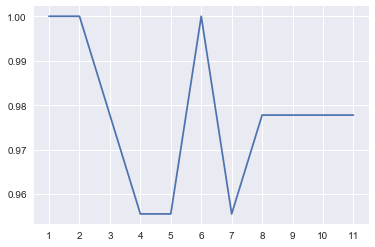

In [184]:
neighbor = [1,2,3,4,5,6,7,8,9,10,11]
plt.plot(neighbor, a)
plt.xticks(neighbor)


In [178]:
algo = KNeighborsClassifier(n_neighbors = np.argmax(a)+1)
algo.fit(train_X,train_Y)
prediction = algo.predict(test_X)
metrics.accuracy_score(prediction,test_Y)

1.0

### Now we will divide the Petl and Sepal Features and see how they differ in giving us the accuracy of prediction.

In [179]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm', 'SepalWidthCm','Species']]
print(petal.head())
print('_'*50)
print(sepal.head())

   PetalLengthCm  PetalWidthCm      Species
0            1.4           0.2  Iris-setosa
1            1.4           0.2  Iris-setosa
2            1.3           0.2  Iris-setosa
3            1.5           0.2  Iris-setosa
4            1.4           0.2  Iris-setosa
__________________________________________________
   SepalLengthCm  SepalWidthCm      Species
0            5.1           3.5  Iris-setosa
1            4.9           3.0  Iris-setosa
2            4.7           3.2  Iris-setosa
3            4.6           3.1  Iris-setosa
4            5.0           3.6  Iris-setosa


In [180]:
train_p, test_p = train_test_split(petal, test_size = 0.3)
train_X_p = train[['PetalLengthCm','PetalWidthCm']]
train_Y_p = train['Species']
test_X_p = test[['PetalLengthCm','PetalWidthCm']]
test_Y_p = test.Species
print(train_X_p.head())
print('_'*65)
print(train_Y_p.head())
print('_'*65)
print(test_X_p.head())
print('_'*65)
print(test_Y_p.head())

print('='*100)

train_s, test_s = train_test_split(sepal, test_size = 0.3)
train_X_s = train[['SepalLengthCm','SepalWidthCm']]
train_Y_s = train['Species']
test_X_s = test[['SepalLengthCm','SepalWidthCm']]
test_Y_s = test.Species
print(train_X_s.head())
print('_'*65)
print(train_Y_s.head())
print('_'*65)
print(test_X_s.head())
print('_'*65)
print(test_Y_s.head())

     PetalLengthCm  PetalWidthCm
102            5.9           2.1
47             1.4           0.2
83             5.1           1.6
45             1.4           0.3
49             1.4           0.2
_________________________________________________________________
102     Iris-virginica
47         Iris-setosa
83     Iris-versicolor
45         Iris-setosa
49         Iris-setosa
Name: Species, dtype: object
_________________________________________________________________
     PetalLengthCm  PetalWidthCm
82             3.9           1.2
78             4.5           1.5
145            5.2           2.3
80             3.8           1.1
149            5.1           1.8
_________________________________________________________________
82     Iris-versicolor
78     Iris-versicolor
145     Iris-virginica
80     Iris-versicolor
149     Iris-virginica
Name: Species, dtype: object
     SepalLengthCm  SepalWidthCm
102            7.1           3.0
47             4.6           3.2
83             6.0 

In [181]:
algo=SVC()
algo.fit(train_X_p,train_Y_p) 
prediction=algo.predict(test_X_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_Y_p))

algo=SVC()
algo.fit(train_X_s,train_Y_s) 
prediction=algo.predict(test_X_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_Y_s))

The accuracy of the SVM using Petals is: 0.977777777778
The accuracy of the SVM using Sepal is: 0.822222222222


In [182]:
algo=DecisionTreeClassifier()
algo.fit(train_X_p,train_Y_p) 
prediction=algo.predict(test_X_p) 
print('The accuracy of the DecisionTreeClassifier using Petals is:',metrics.accuracy_score(prediction,test_Y_p))


algo.fit(train_X_s,train_Y_s) 
prediction=algo.predict(test_X_s) 
print('The accuracy of the DecisionTreeClassifier() using Sepal is:',metrics.accuracy_score(prediction,test_Y_s))

The accuracy of the DecisionTreeClassifier using Petals is: 0.977777777778
The accuracy of the DecisionTreeClassifier() using Sepal is: 0.733333333333


In [183]:
algo=KNeighborsClassifier(n_neighbors=3)
algo.fit(train_X_p,train_Y_p) 
prediction=algo.predict(test_X_p) 
print('The accuracy of the KNeighborsClassifier using Petals is:',metrics.accuracy_score(prediction,test_Y_p))


algo.fit(train_X_s,train_Y_s) 
prediction=algo.predict(test_X_s) 
print('The accuracy of the KNeighborsClassifier using Sepal is:',metrics.accuracy_score(prediction,test_Y_s))

The accuracy of the KNeighborsClassifier using Petals is: 0.977777777778
The accuracy of the KNeighborsClassifier using Sepal is: 0.777777777778


### Thus we see that taking Petal features gives better accuracy than taking Sepal features. Also we can see that their are afew algorithms which are giving better accuracy than the others. Though the accuracy will vary depending on the random split of our Train and Test Data.